# Защита персональных данных клиентов

Нужно защитить данные клиентов страховой компании «Хоть потоп». 
Чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

- Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

- Обосновать корректность его работы.


**Разделим исследование на несколько частей.**

**Часть 1. Изучение общей информации:**
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [2. Предобработка данных. Изменение типов данных.](#2-bullet)

**Часть 2. Умножение матриц**
* [1. Признаки умножают на обратимую матрицу.
Изменится ли качество линейной регрессии?.](#3-bullet)

**Часть 3. Алгоритм преобразования**
* [1.Создадем обратимую матрицу;](#4-bullet)
* [2.Применим формулу без умножения 𝑋 — матрицы на обратимую;](#5-bullet)
* [3. После чего умножим 𝑋 — матрицу признаков на обратимую, тем самым зашифровав ее;](#6-bullet)


**Часть 4. Проверка алгоритма**
* [1.Равенство матриц и метрики качества R2;](#7-bullet)

**Часть 5. Заключение = Вывод**

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score 

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('insurance.csv')
df.info() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [3]:
display(df)
display(df.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [4]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

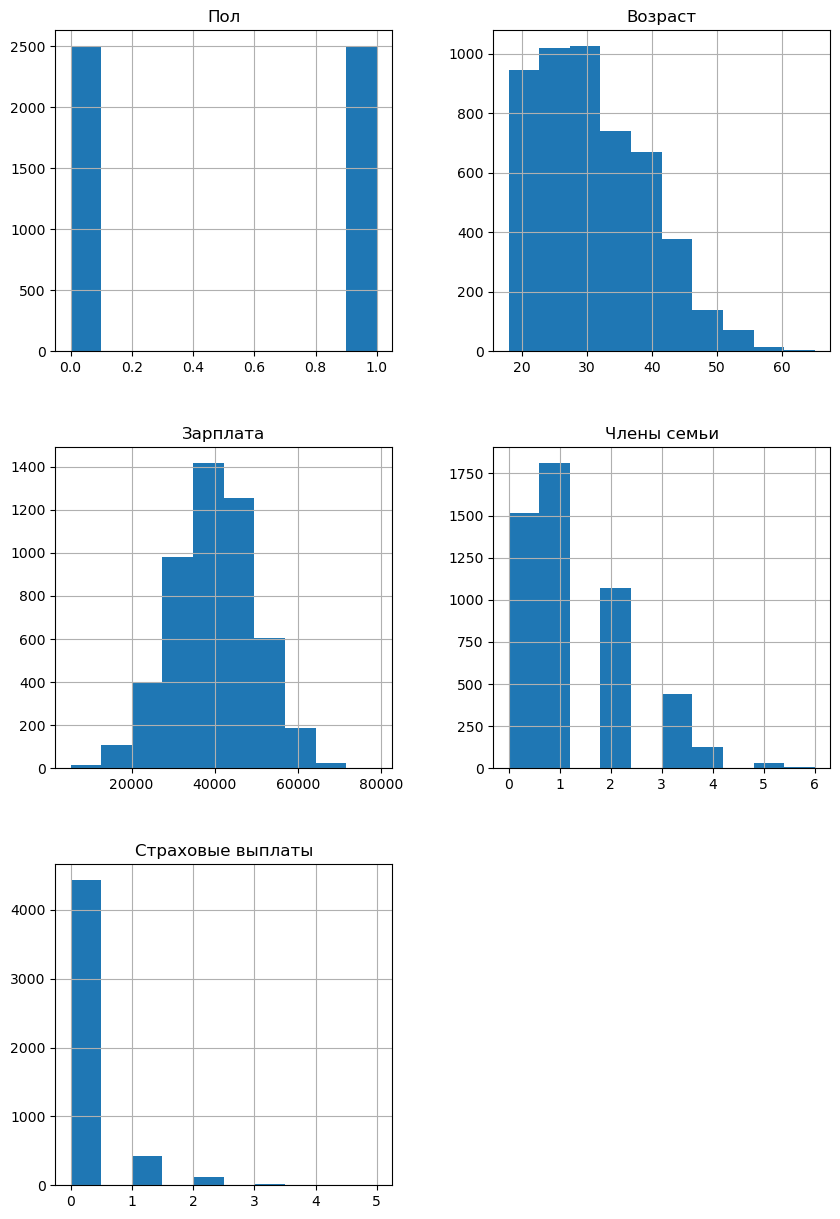

In [5]:
df.hist(figsize=(10, 15));

In [6]:
display(df.duplicated().sum())

153

### Вывод по первому блоку:

- всего в датафрейме 5000 строк и 5 столбцов;
- пустых строк не наблюдается;
- в выборке участвует 50% женщин и 50% мужчин, идеальный баланс);
- аномальных значений в признаках датафрейма не наблюдается;
- есть наличие полных дубликатов в количестве 153 строк, но среди 5000 людей это не вызывает тревожности и кажется нормальным.


### Предобработка данных

**Приведем все столбцы к типу int64**

In [7]:
df['Возраст'] = df['Возраст'].astype('int64')
df['Зарплата'] = df['Зарплата'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


### Разделим данные на тренировочную выборку и целевой признак

In [9]:
# features=df.drop(['Страховые выплаты'],axis=1)
# target=df['Страховые выплаты']

In [10]:
# train_features, test_features, train_target, test_target = train_test_split(features, 
#                                                                                   target, 
#                                                                                   test_size=0.25, 
#                                                                                   random_state=12345)

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$;

если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.


Обозначения:
​
- $X$ — матрица признаков (нулевой столбец состоит из единиц)
​
- $y$ — вектор целевого признака
​
- $P$ — матрица, на которую умножаются признаки
​
- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу.

Изменится ли качество линейной регрессии? (Её можно обучить заново.)

- $X$ — матрица признаков
- $А$ - обратимая матрица

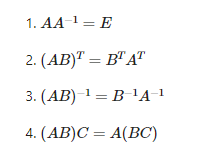

Задача обучения с признаками умноженными на обратимую матрицу:

$$
w = (X^T A^T XA)^{-1} X^T A^T y
$$

$$
w = ((XA)^T XA)^{-1} X^T A^T y
$$

$$
w = A^{-1}(A^T X^T X)^{-1} (A)^T X^T y
$$

$$
w = A^{-1}(X^T X)^{-1} (A^T)^{-1} A^T X^T y
$$

При перемножении
$$
(A^T)^{-1} A^T
$$

выходит единичная матрица E, сократим уравнение:

Правило**: Если любую матрицу X умножить на единичную (или наоборот), получится эта же матрица X:

$$
w = A^{-1}(X^T X)^{-1} X^T y
$$

теперь у нас получается практически прежняя формула только умноженная на обратимую матрицу 

$$
w = (X^T X)^{-1} X^T y
$$

$$
w = А^{-1} w
$$

а предсказание у нас:

$$
a = Xw
$$

подставим наше уравнение в предсказание с матрицей перемноженой на обратимную

$$
a = XAA^{-1}w
$$

Опять вспоминаем про правило

Обратная для квадратной матрицы A (англ. inverse matrix) это матрица A с верхним индексом -1, произведение которой на А равно единичной матрице. 

 Если любую матрицу Х умножить на единичную (или наоборот), получится эта же матрица Х


$$
a = Xw
$$

**Ответ:** Качество линейной регрессии не изменится.

**Обоснование:** После сокращения формулы обучения, предсказания по признакам умноженным на обратимую матрицу будут равны предсказаниям по признакам.

$$
a = XAA^{-1}w == Xw
$$

## 3.Алгоритм преобразования

**Алгоритм**

Исходя из формулы умножения на обратную матрицу, чтобы зашифровать данные будем использовать обратную матрицу.

1) Напишем формулу обучения; 

2) Затем создадим обратимую матрицу;

3) Применим формулу без умножения 𝑋 — матрицы на обратимую;

3) После чего умножим 𝑋 — матрицу признаков на обратимую, тем самым зашифровав ее;

4) Сравним метрики R2.

**Обоснование**

Так как предсказания равны , при умножении матрицы признаков на обратимую матрицу, метрики качества не изменятся.

•	Вычисляется обратная к результату матрица: np.linalg.inv(...)

Напишем функцию, которая создаст обратимую матрицу, и зашифрует признаки умножив их на обратимую матрицу

In [11]:
def matrix(features):
    # Создание случайную матрицу размером по количеству признаков 4х4
    random_matrix = np.random.rand(len(features.columns),len(features.columns))
    # Проверяем, что определитель матрицы не равен нулю 
    # linalg.det(а) Вычисляет определитель массива.
    if np.linalg.det(random_matrix) != 0:
        # Если определитель не равен нулю, то матрица обратима
        # Если матрица обратима, то находим ее обратную
        inverse_matrix = np.linalg.inv(random_matrix)
        print("Обратимая матрица:\n", inverse_matrix)
        # умножаем матрицу признаков на обратную матрицу - создаем шифр
        encrypted_features = features@inverse_matrix
        return encrypted_features, inverse_matrix
    else:
        print("Матрица не обратима")
        


In [12]:
# def encrypt_features(features):
#     # создаем случайную матрицу размером с матрицу признаков
#     random_matrix = np.random.rand(*features.shape)
#     # вычисляем обратную матрицу для случайной матрицы
#     inverse_matrix = np.linalg.inv(random_matrix)
#     # умножаем матрицу признаков на обратную матрицу
#     encrypted_features = features.dot(inverse_matrix)
#     return encrypted_features, inverse_matrix


Создадим функцию для обучения модели линейной регресии, которая вернет значение метрики R2

In [13]:
def train_linear_regression(features, target):
    # разделяем данные на обучающую и тестовую выборки
    features_train, features_test, target_train, target_test = train_test_split(features, target,\
                                                                    test_size=0.25, random_state=12345)
    # создаем объект модели линейной регрессии
    model = LinearRegression()
    # обучаем модель на обучающей выборке
    model.fit(features_train, target_train)
    # делаем предсказания на тестовой выборке
    y_pred = model.predict(features_test)
    # вычисляем метрику R2 для предсказаний
    r2 = r2_score(target_test, y_pred)
    return  print(r2)



## 4. Проверка алгоритма

Определим нецелевые признаки и целевой признак

In [14]:
features=df.drop(['Страховые выплаты'],axis=1)

target=df['Страховые выплаты']

Создадим обратимую матрицу и зашифрованые признаки

In [15]:
features_A,A = matrix(features)

Обратимая матрица:
 [[ 1.71500001 -0.38010335  0.49433185 -1.56298248]
 [-1.51992852  2.09925843  1.60812368 -2.23190519]
 [-0.2568348   1.82390927 -0.6892647  -0.62983793]
 [-0.51296972 -1.82430011 -0.49300366  3.86369531]]


**R2** на исходных данных

In [16]:
r2_data = train_linear_regression(features, target)

0.435227568408335


**R2** на зашифрованных данных

In [17]:
r2_A = train_linear_regression(features_A, target)

0.43522756840832033


Метрика R2 одинакова для исходных данных и для зашифрованных.

Вернем зашифрованную матрицу к исходной путем умножения на обратную матрицу. Сравним с исходными данными.

In [18]:
features_return= features_A @  np.linalg.inv(A)
features_return.head(5)

,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,5.456968e-12,46.0,38000.0,1.000000e+00
2,-9.094947e-13,29.0,21000.0,-1.818989e-12
3,-7.275958e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,0.000000e+00


Проверим равенство исходных данных и зашифрованных после преобразования обратно в исходные.

In [19]:
if np.allclose(features.astype(np.float64), features_return.astype(np.float64), rtol=1e-3):
    print("Матрицы равны")
else:
    print("Матрицы различны")

Матрицы равны


### ВЫВОД


- Согласно задаче данные были зашифрованы путем умножения матрицы признаков на обратимую матрицу равную по размерам количеству признаков в датафрейме;
- Проверка на качество после умножения обратимой матрицы на признаки не изменилось;
- Метрика R2 равна 0.4352275684083 как на исходных данных, так и на зашифрованных;
- Проверка на возвращение к исходным данным удалась. Защифрованные данные умноженные на обратную матрицу вернули к прежним результатам.